# Solution hints to exercise sheet 2

## Exercise 1
Besides checking the conditions for a dynamical system, please make sure that you get an intuition as to why these conditions are meaningful in the first place. And so, the conditions are that $\varphi_0 = \text{id}$ and $\varphi_t\circ\varphi_s = \varphi_{t+s}$ for any $t,s\in\mathcal{T}$. Usually, each $\varphi_t$ is required to have some additional regularity like measurability, continuity or smoothness, consistent with the regularity structure of the space that the $\varphi$'s act on.
1. It is straightforward to check that $\varphi_0 \neq \text{id}$. Therefore, this cannot be a dynamical system.
2. There are two options here:

    * You check the algebraic conditions by hand, making use of [angle sum identities/Additionstheoreme](https://en.wikipedia.org/wiki/List_of_trigonometric_identities#Angle_sum_and_difference_identities), to verify that this is indeed a dynamical system.
    * You realize that the given dynamical system candidate is the backward solution of the well-posed harmonic oscillator equation, i.e., $\varphi_t=\varphi_{-t}^{\text{osc}}$, from which it directly follows that this is a dynamical system (recall, that general solutions to well-posed ODEs form dynamical systems).

## Exercise 2
You can solve the differential equation for any initial condition up to the zeros of the rhs using the separation of variables approach [Wolfram Alpha](http://www.wolframalpha.com/input/?i=solve+x%27+%3D+x*log(x)). This approach gives a valid solution formula until a solution possibly hits the equilibrium. The zeros of the rhs, however, correspond exactly to equilibria of the dynamical system.

The rhs function vanishes obviously at $x=1$. Moreover, it can be continuously extended to $x=0$ by the function value $0$ (check with L'Hopital). Therefore, the two equilibria are 0 and 1. We need to clarify, however, on which domain the ODE is guaranteed to be well-posed. For any equilibrium that falls into that domain we are guaranteed that no solution can attain it, since this would violate uniqueness of solutions. Make sure you follow this argument: as I exaggerated in the tutorial session, violation-of-uniqueness-of-solutions is one word, and you should be able to use this argument. To this end, we need local Lipschitz-continuity, which holds for $x>0$, but fails for $x=0$. This means, that we may have distinct solutions growing out of $x_0=0$. For that reason, it is safer to exclude 0 from the domain of the dynamical system, unless we had alternative arguments for the uniqueness of the equilibrium solution $x=0$.

## Exercise 3
1. Prove by contradiction, assuming that $S$ is positively invariant and $\mathcal{X}\setminus S$ is not negatively invariant.
2. This is clear since $(-1,1)^{\top}$ is an eigenvector of the system's matrix:

In [1]:
A = [-2.0 -1.0; 1.0 0.0]
v = [-1.0, 1.0]
A*v == -1.0*v

true

3. (This should be a 3., but markdown does its own counting; sorry for the inconvenience :-)) This is probably best shown by tracking the value of $E$ along solutions of the pendulum equation, which satisfy

    $\ddot{x}+\sin x =0$.

    To have that level sets of $E$ are invariant, this value should not change along orbits, so we need to verify that

    $\left(t\mapsto E\left(\varphi_t(x_0),\partial_s\varphi_s(x_0)\bigr|_{s=t}\right)\right)'= 0,$

    which is straightforward.

## Exercise 4
Both exercises are straightforward: in the first one, you verify the condition of Lyapunov's stability criterion for some appropriate choice of $\alpha, \beta, \gamma>0$, in the second you apply LaSalle's invariance principle.

## Numerical excursions
Let's look at a simple ODE example--the linear example above--and plot a phase portrait.

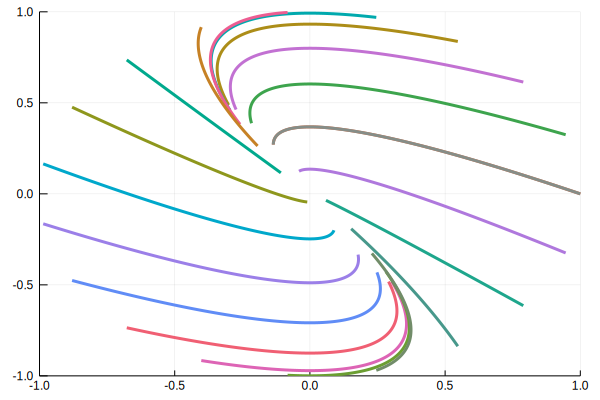

In [2]:
using OrdinaryDiffEq, Plots
rhs = (u,p,t) -> A*u
α = linspace(0,2π,20)
x0 = [[cos(a), sin(a)] for a in α] # this is a list of initial conditions
prob = ODEProblem(rhs,[0.0, 0.0],(0.0, 2.0))
sol = solve(prob,Tsit5())
fig = plot(sol,vars=(1,2),leg=false,xlims=(-1., 1.),ylims=(-1., 1.))
for x in x0
    prob = ODEProblem(rhs,x,(0.0, 2.0))
    sol = solve(prob,Tsit5())
    plot!(sol,vars=(1,2),xlims=(-1., 1.),ylims=(-1., 1.))
end
plot(fig)

As for how to use Julia's DynamicalSystems.jl package, see this wonderful [introductory notebook](https://github.com/JuliaDynamics/tutorials/blob/master/1.%20Creating%20a%20dynamical%20system.ipynb).